In [1]:
#
import mne
import os
import scipy.io
import listen_italian_functions
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
from itertools import combinations,permutations
from IPython.display import clear_output
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.5)

data_path = os.path.dirname(os.path.dirname(os.getcwd()))

subject_name = ['Alice','Andrea','Daniel','Elena','Elenora','Elisa','Federica','Francesca','Gianluca1','Giada','Giorgia',
                'Jonluca','Laura','Leonardo','Linda','Lucrezia','Manu','Marco','Martina','Pagani','Pasquale','Sara',
                'Silvia','Silvia2','Tommaso']

remove_first = 0.5 #seconds
raw_fname = data_path + '/behaviour/data/stimuli_features_withSpeech.mat'
mat = scipy.io.loadmat(raw_fname)

speech = mat['behaviour']['speech'][0][0]
envelop = mat['behaviour']['envelop'][0][0]
jawaopening = mat['behaviour']['jawaopening'][0][0]
lipaparature = mat['behaviour']['lipaparature'][0][0]
lipProtrusion = mat['behaviour']['lipProtrusion'][0][0]
TTCD = mat['behaviour']['TTCD'][0][0]
TMCD = mat['behaviour']['TMCD'][0][0]
TBCD = mat['behaviour']['TBCD'][0][0]
time = mat['behaviour']['time'][0][0]

extra_channels = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
# Initialize an info structure
ch_names = extra_channels
ch_types = np.repeat('eeg', len(ch_names))
info = mne.create_info(ch_names = ch_names,ch_types = ch_types,sfreq = 400)



In [2]:
trial_len=3
first_samp=int(0.5 *400)
last_samp=int((trial_len+1.5) *400)

In [3]:
trial_len

3

In [4]:
# normalize ema features
A = np.empty([200, 7,2])


for f in range(0,len(extra_channels)):
    for i in range(200):       
        A[i,f,0] = max(mat['behaviour'][extra_channels[f]][0][0][i][0])[0]
        A[i,f,1] = min(mat['behaviour'][extra_channels[f]][0][0][i][0])[0]
        
for i in range(200):       
    a = jawaopening[i][0]
    a = (a - A[:,1,1].min())/(A[:,1,0].max() - A[:,1,1].min())
    jawaopening[i][0] = a
    
    a = lipaparature[i][0]
    a = (a - A[:,2,1].min())/(A[:,2,0].max() - A[:,2,1].min())
    lipaparature[i][0] = a
    
    a = lipProtrusion[i][0]
    a = (a - A[:,3,1].min())/(A[:,3,0].max() - A[:,3,1].min())
    lipProtrusion[i][0] = a
    
    a = TTCD[i][0]
    a = (a - A[:,4,1].min())/(A[:,4,0].max() - A[:,4,1].min())
    TTCD[i][0] = a
    
    a = TMCD[i][0]
    a = (a - A[:,5,1].min())/(A[:,5,0].max() - A[:,5,1].min())
    TMCD[i][0] = a
    
    a = TBCD[i][0]
    a = (a - A[:,6,1].min())/(A[:,6,0].max() - A[:,6,1].min())
    TBCD[i][0] = a    
    
raw_fname = data_path + '/behaviour/data/stimuli_features_normalized.mat'
scipy.io.savemat(raw_fname, mat)

(-72.25, 1517.25, -0.8789871215820313, 0.9529922485351563)

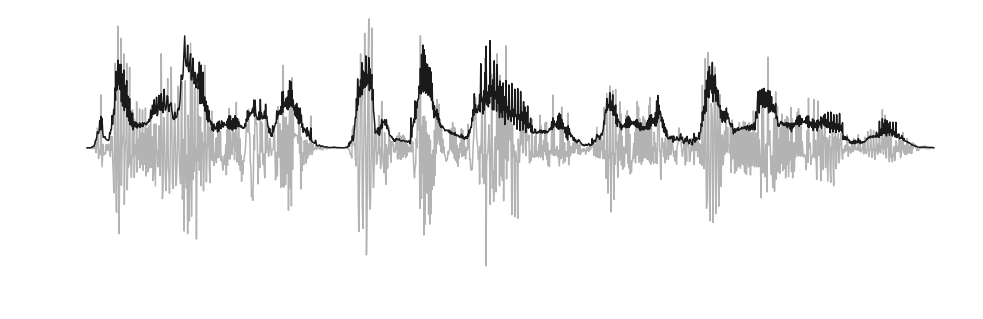

In [5]:
# plot an example
x=20
sns.set(style="white")

f, ax = plt.subplots(figsize=(16.7,5))

ax.plot(speech[x][0],color='0.7')
ax.plot(envelop[x][0][0] *4,color='k')
ax.set_xlabel('Time (ms)')
#ax.set_ylabel('Amplitude', color='b')
ax.tick_params('y', colors='b')
#ax.legend(['Audio Signal', 'Speech Envelope'],loc=1)
#ax.axes.get_yaxis().set_visible(False)
ax.axis('off')


(0, 1)

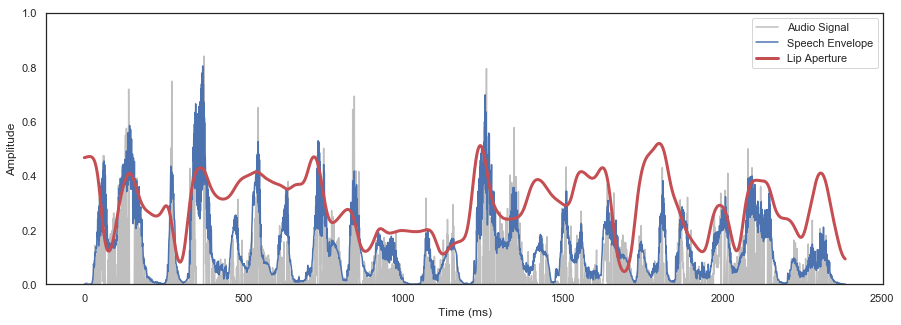

In [7]:
# plot an example
x=2

f, ax = plt.subplots(figsize=(15,5))

plt.plot(speech[x][0],color='0.75')
plt.plot(envelop[x][0][0] *4,color='C0')
plt.plot(lipaparature[x][0],linewidth=3,color='r')


ax.legend(['Audio Signal', 'Speech Envelope','Lip Aperture'])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_ylim([0,1])

In [8]:
# duration stumuli
for i in range(0,200):
    print(i,np.round(time[i][0][0][-1],2))

0 2.95
1 2.23
2 5.95
3 4.87
4 4.83
5 3.3
6 3.72
7 2.7
8 2.94
9 3.08
10 2.25
11 3.34
12 3.15
13 3.18
14 1.93
15 3.48
16 7.34
17 8.57
18 2.36
19 2.81
20 3.6
21 2.39
22 4.14
23 3.87
24 4.4
25 2.25
26 3.5
27 3.41
28 4.58
29 7.21
30 3.63
31 3.66
32 3.79
33 3.86
34 4.46
35 2.71
36 6.32
37 3.4
38 6.24
39 5.95
40 2.93
41 3.63
42 2.2
43 4.39
44 2.52
45 4.39
46 3.01
47 2.76
48 3.99
49 4.52
50 2.95
51 2.23
52 5.95
53 4.87
54 4.83
55 3.3
56 3.72
57 2.7
58 2.94
59 3.08
60 2.25
61 3.34
62 3.15
63 3.18
64 1.93
65 3.48
66 7.34
67 8.57
68 2.36
69 2.81
70 3.6
71 2.39
72 4.14
73 3.87
74 4.4
75 2.25
76 3.5
77 3.41
78 4.58
79 7.21
80 3.63
81 3.66
82 3.79
83 3.86
84 4.46
85 2.71
86 6.32
87 3.4
88 6.24
89 5.95
90 2.93
91 3.63
92 2.2
93 4.39
94 2.52
95 4.39
96 3.01
97 2.76
98 3.99
99 4.52
100 8.61
101 6.08
102 7.5
103 5.48
104 5.79
105 4.35
106 3.99
107 2.79
108 7.92
109 5.16
110 9.13
111 6.8
112 5.05
113 3.19
114 5.49
115 4.33
116 10.83
117 7.44
118 7.51
119 5.12
120 8.29
121 5.2
122 3.66
123 3.32
124 9.24
1

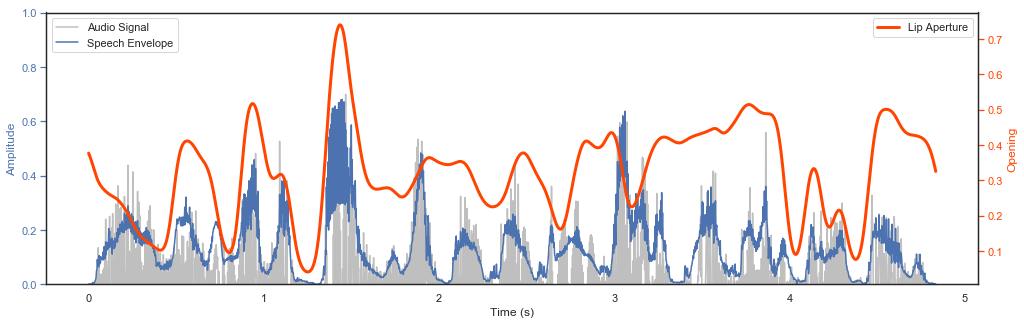

In [9]:
# plot an example
x=54

f, ax = plt.subplots(figsize=(16.7,5))

ax.plot(time[x][0][0],speech[x][0],color='0.75')
ax.plot(time[x][0][0],envelop[x][0][0] *4,color='b')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude', color='b')
ax.tick_params('y', colors='b')
ax.set_ylim([0,1])
ax.legend(['Audio Signal', 'Speech Envelope'],loc=2)

ax2 = ax.twinx()
ax2.plot(time[x][0][0],lipaparature[x][0],linewidth=3,color='orangered')
ax2.set_ylabel('Opening', color='orangered')
ax2.tick_params('y', colors='orangered')

ax2.legend(['Lip Aperture'],loc=1)
ax2.grid(False)

plt.title('')
plt.savefig('fig1a.eps', transparent=True, format='eps', dpi=300)


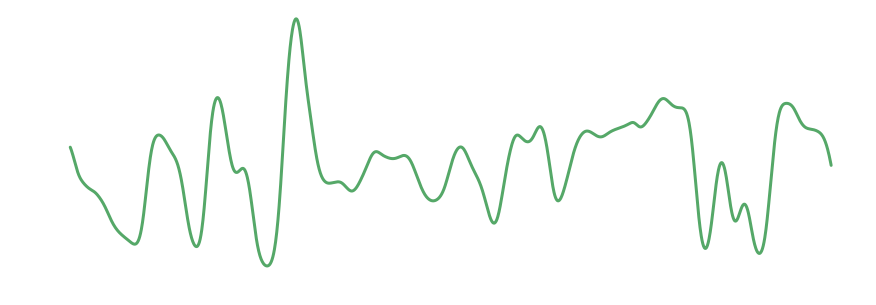

In [10]:
# plot an example
x=4

f, ax = plt.subplots(figsize=(15,5))
#ax.plot(envelop[x][0][0] *4,color='b')
ax.plot(lipaparature[x][0],linewidth=3,color='g')

ax.set_facecolor('w')
ax.axis('off')
plt.savefig('lip_example.png', transparent=True)


This filename (D:\projects\current\listen_italian_motor_entrainment\analysis/python/data/coherence_epochs/Alice-coh-epo-0-4.51-trialLen-3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
Reading D:\projects\current\listen_italian_motor_entrainment\analysis/python/data/coherence_epochs/Alice-coh-epo-0-4.51-trialLen-3.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4507.50 ms
        0 CTF compensation matrices available
70 matching events found
No baseline correction applied
70 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


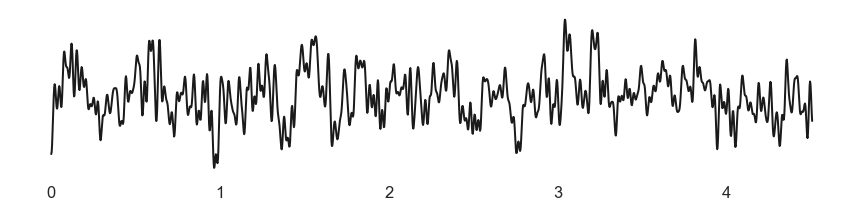

In [89]:
Tmin = 0
Tmax = 3.51
trial_len = 3

GA_epoches = []
save_path = data_path + '/python/data/coherence_epochs/Alice-coh-epo-0-4.51-trialLen-3.fif'
epochs = mne.read_epochs(save_path)
a=epochs['normal'].get_data()

f, ax = plt.subplots(figsize=(15,3))

ax.plot(epochs.times,a[16,26,:],linewidth=2,color='k')
ax.set_facecolor('w')
#ax.axis('off')
ax.axes.get_yaxis().set_visible(False)
plt.savefig('eeg_example.png', transparent=True)
plt.savefig('fig1d1.eps', transparent=True, format='eps', dpi=300)


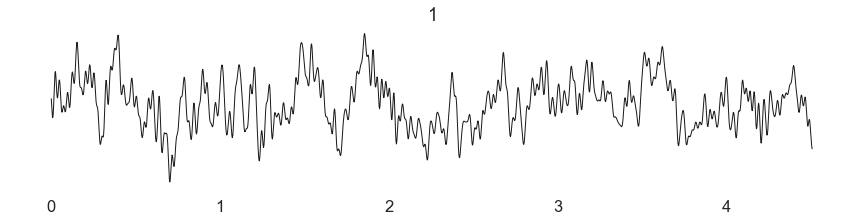

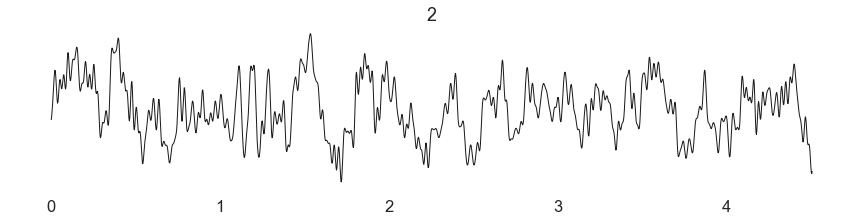

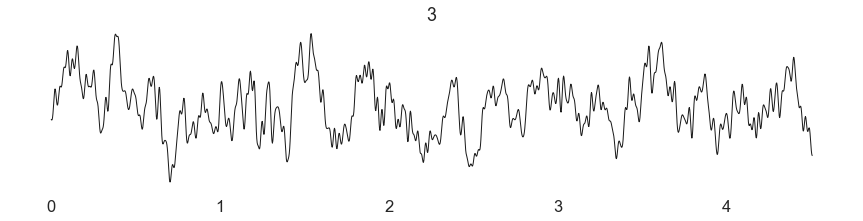

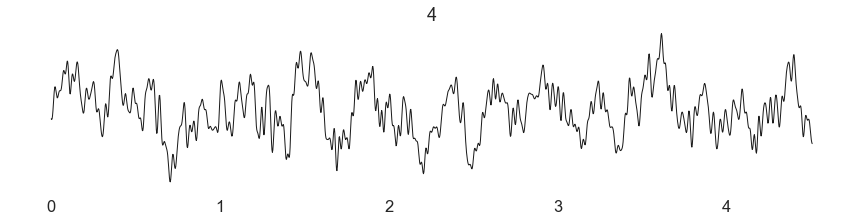

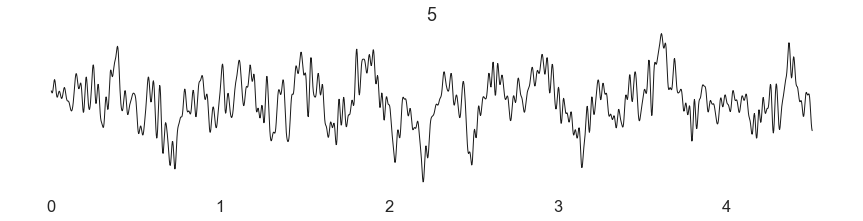

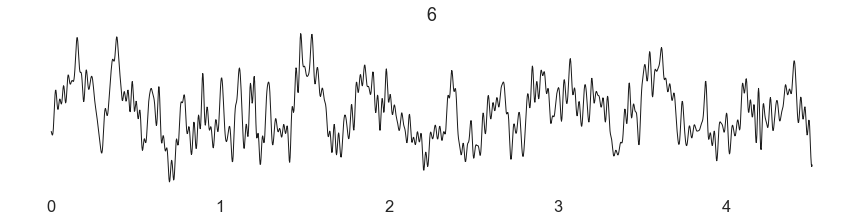

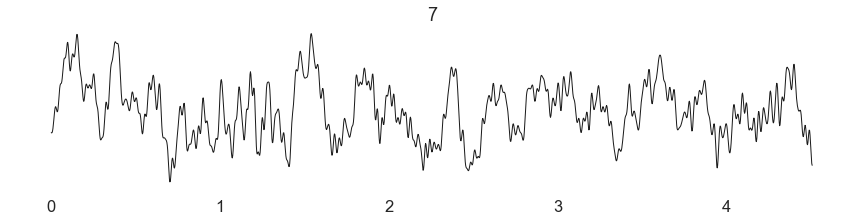

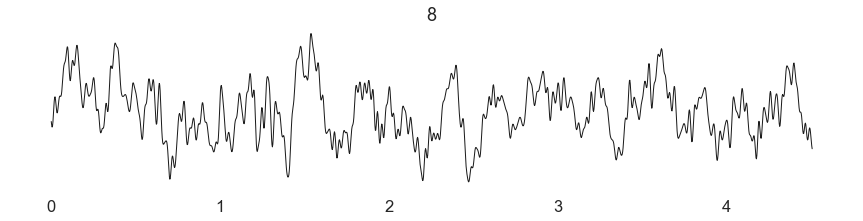

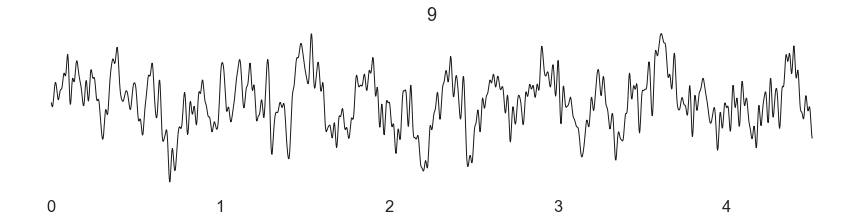

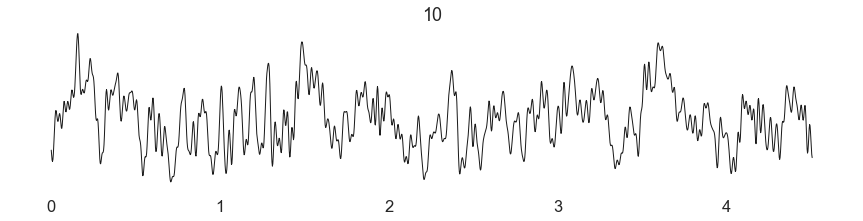

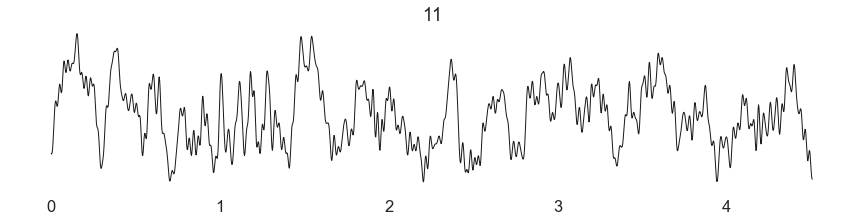

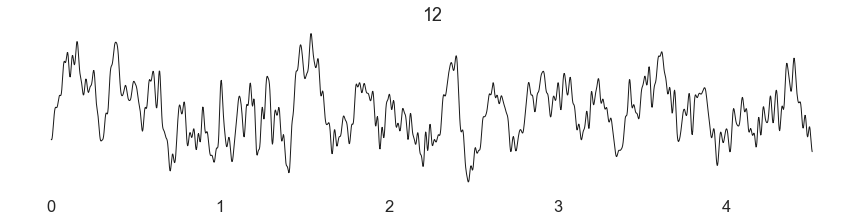

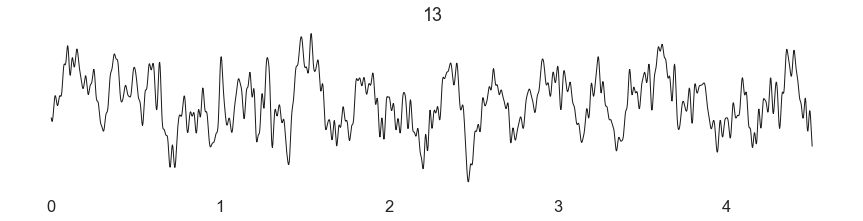

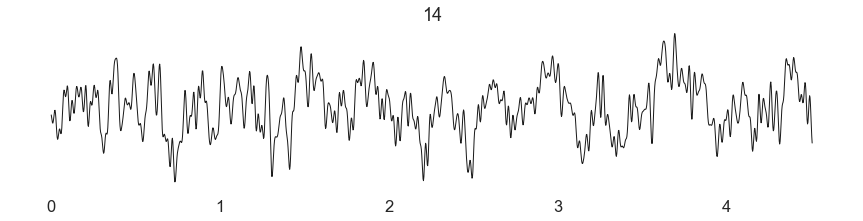

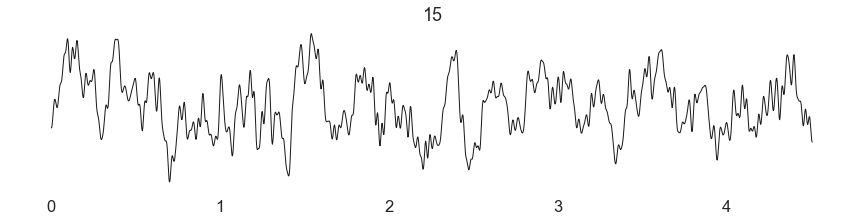

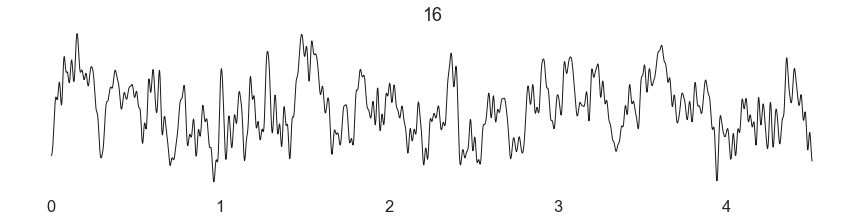

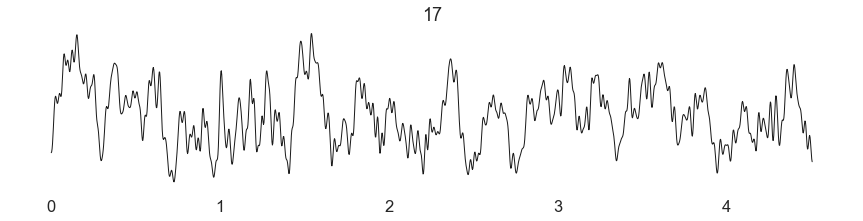

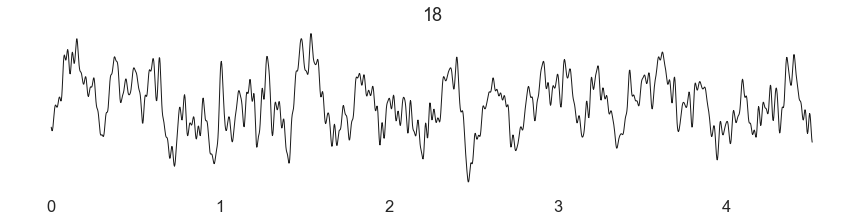

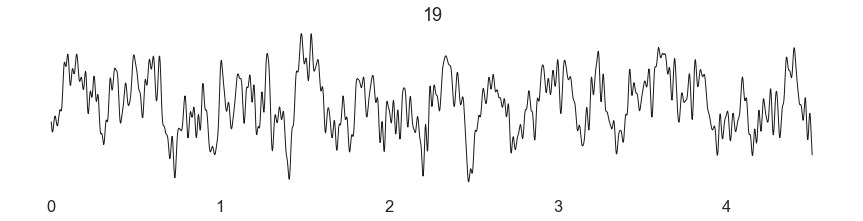

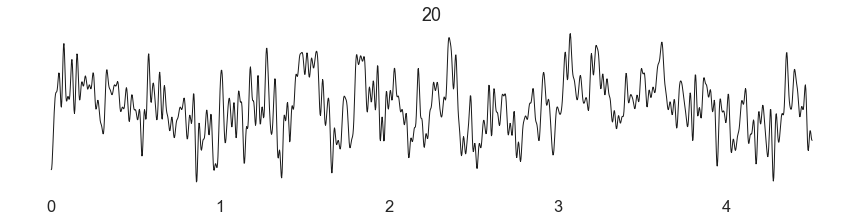

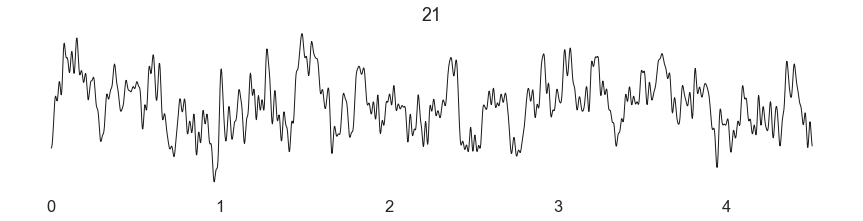

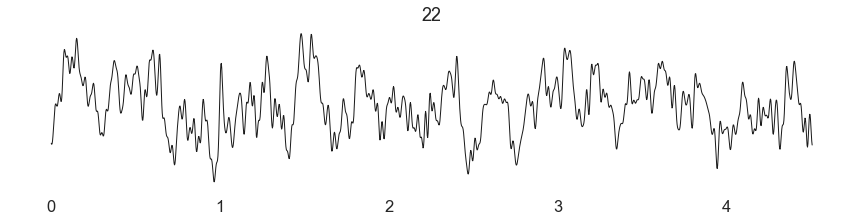

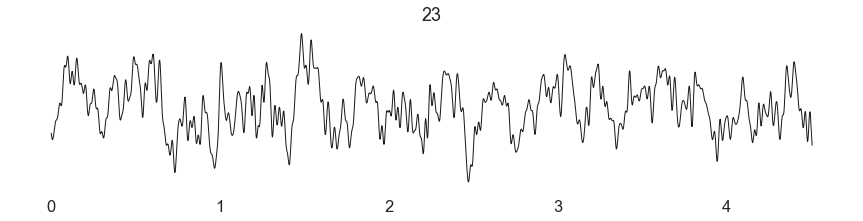

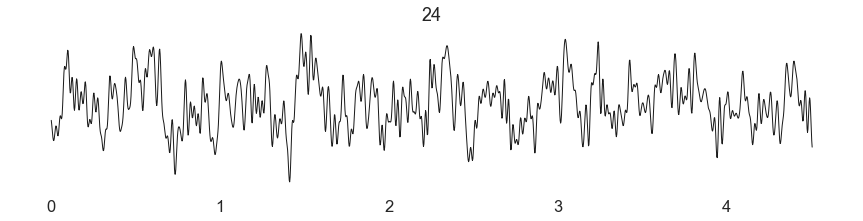

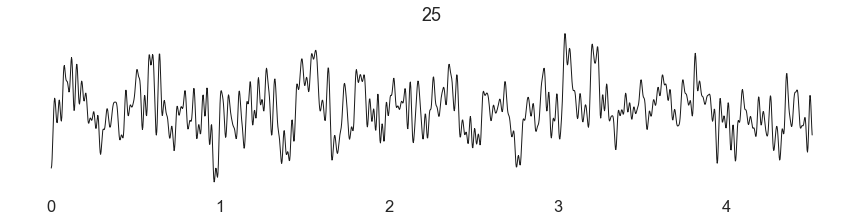

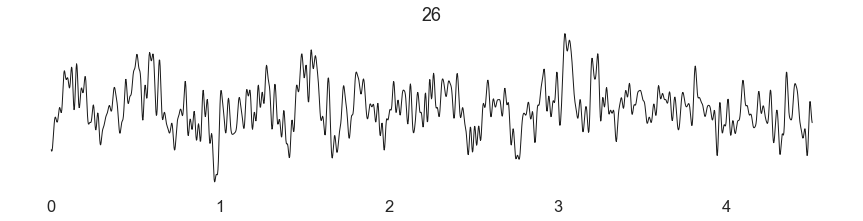

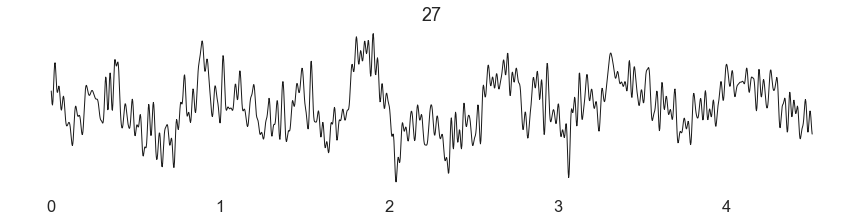

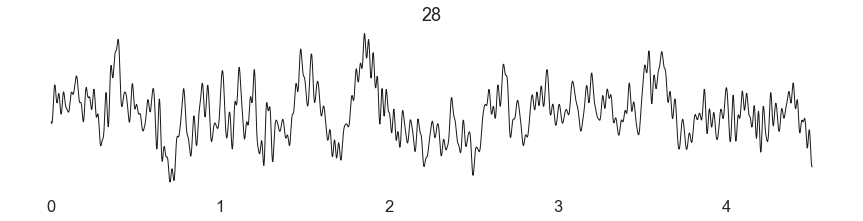

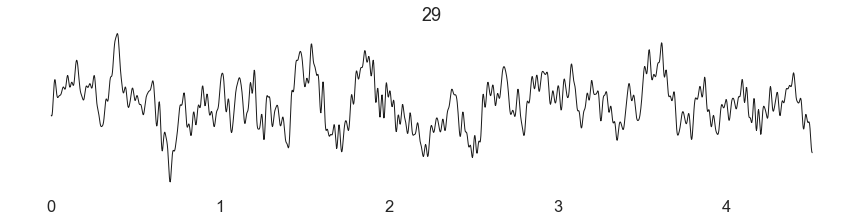

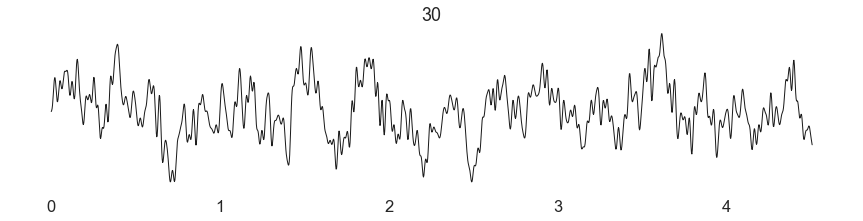

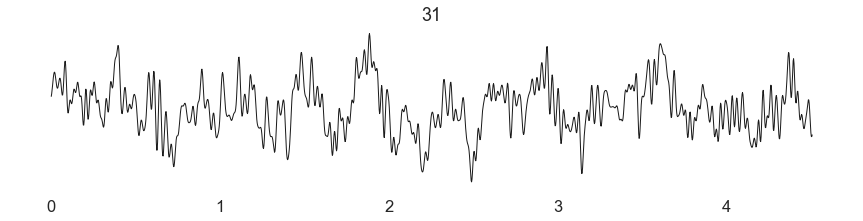

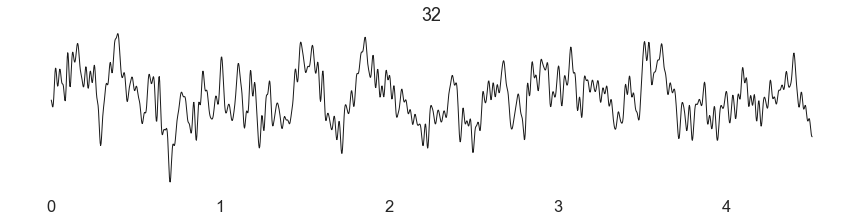

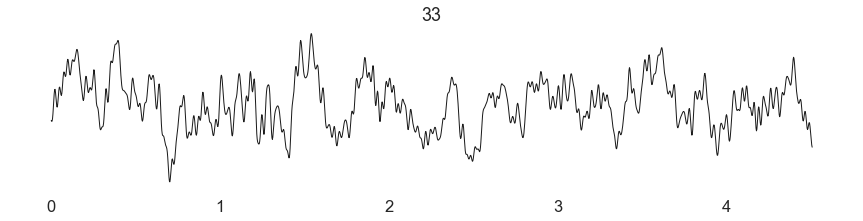

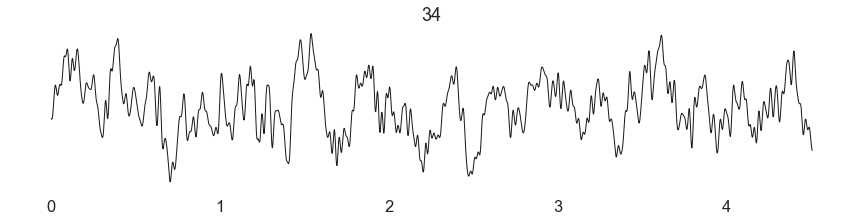

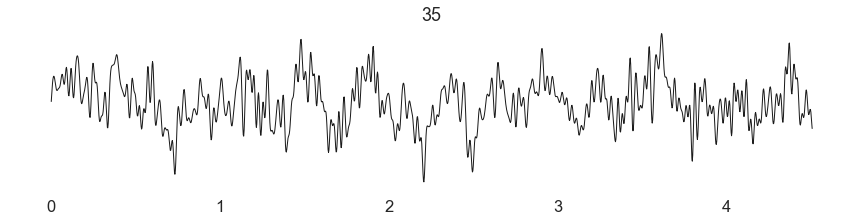

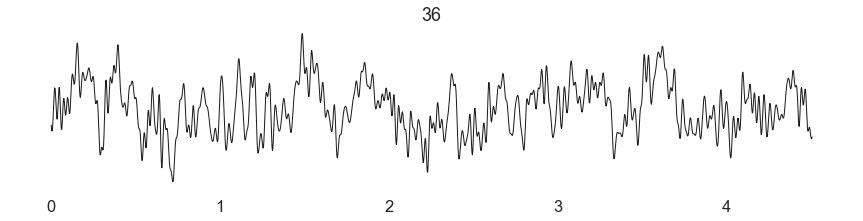

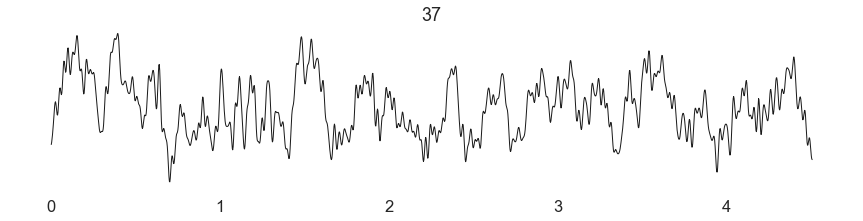

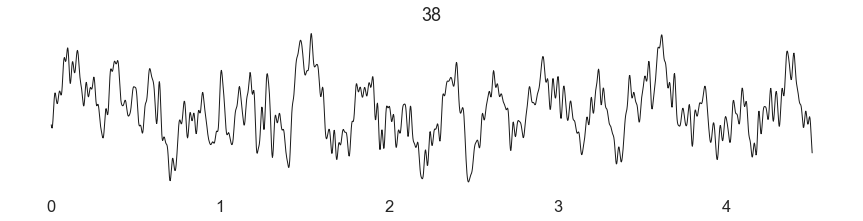

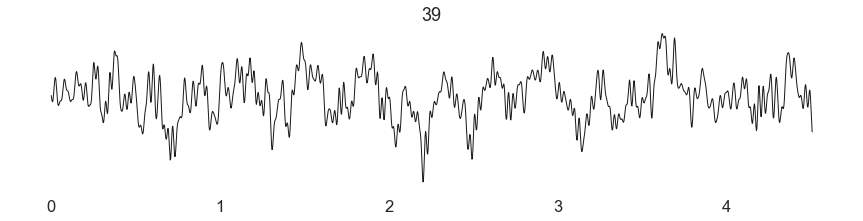

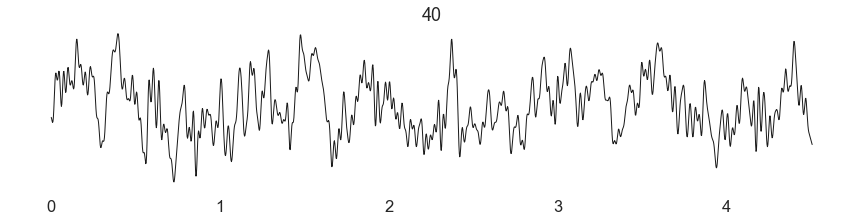

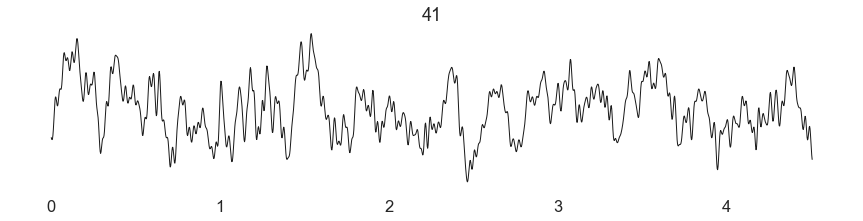

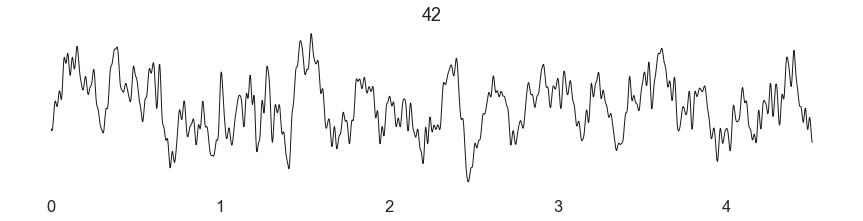

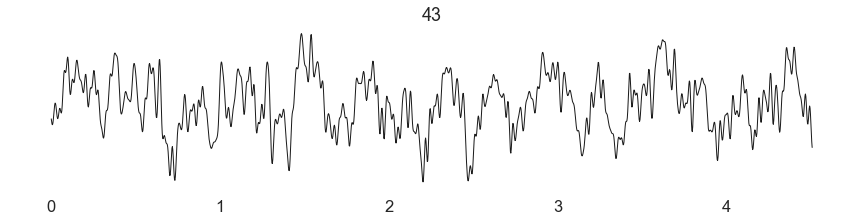

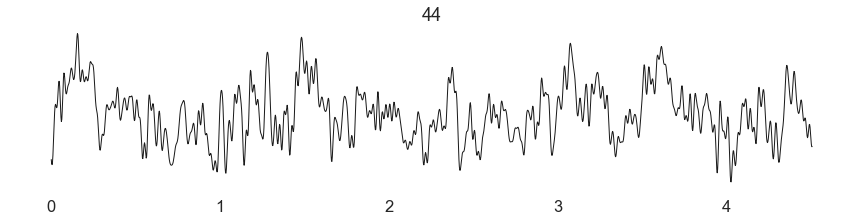

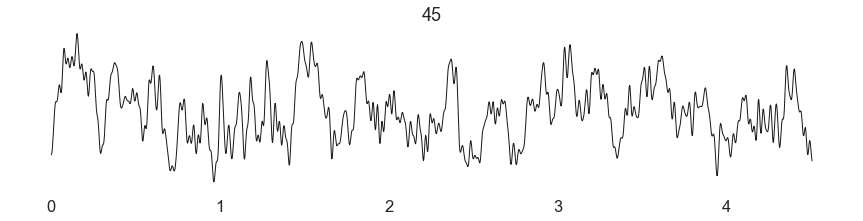

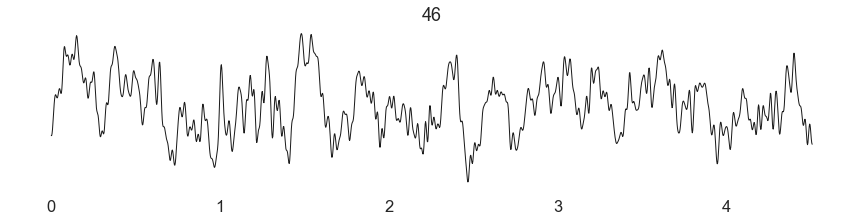

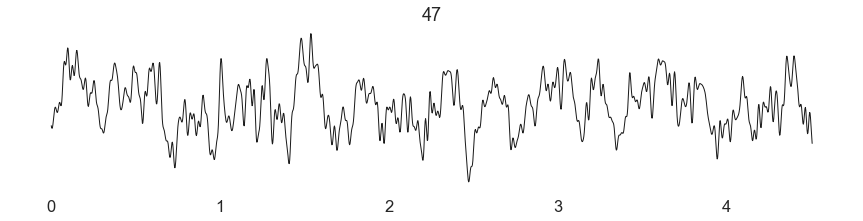

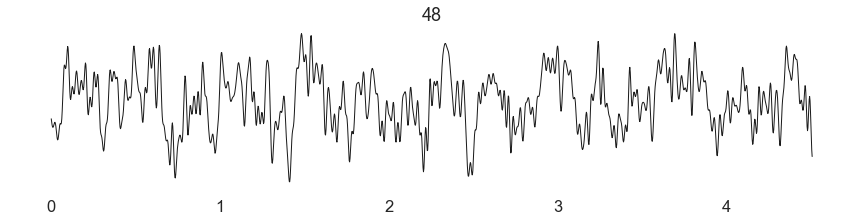

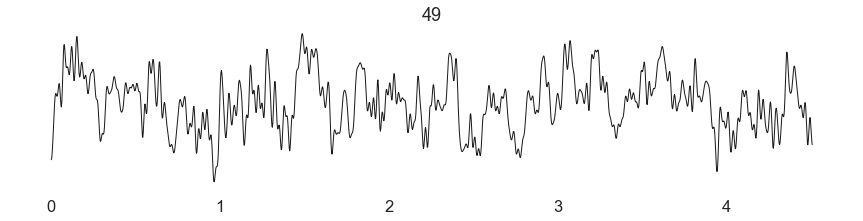

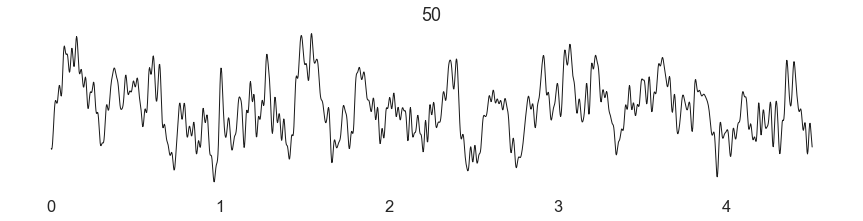

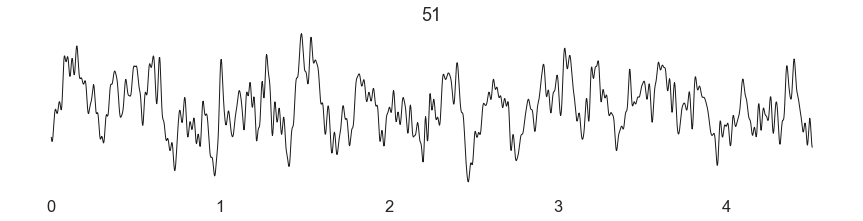

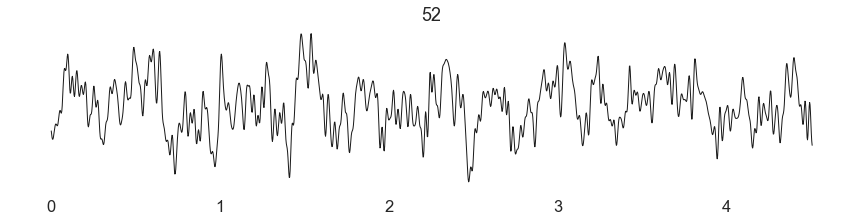

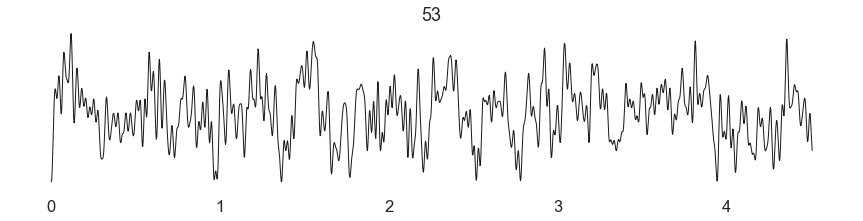

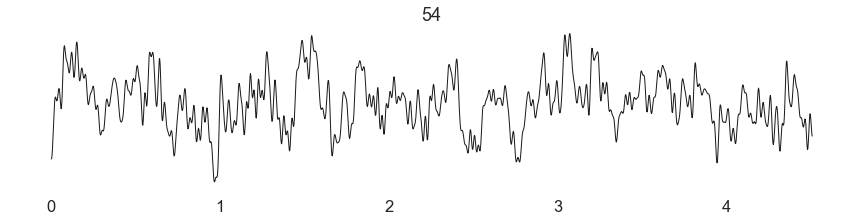

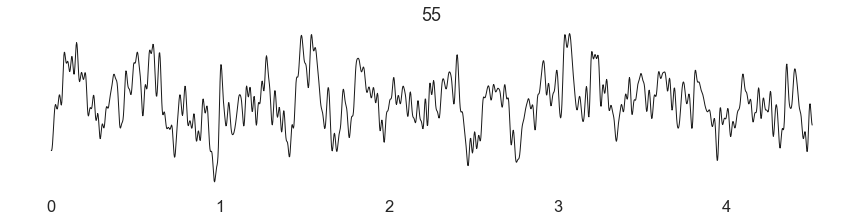

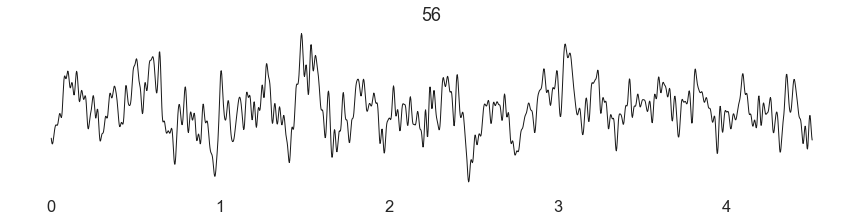

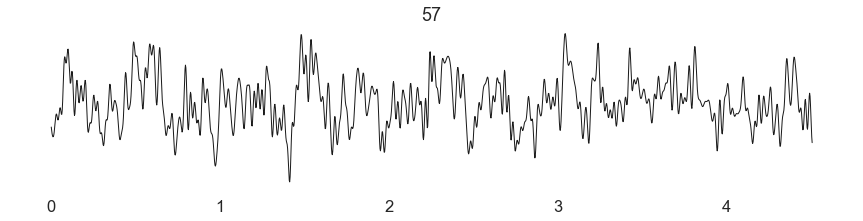

In [84]:
for i in range(1,58):
    f, ax = plt.subplots(figsize=(15,3))
    ax.plot(epochs.times,a[16,i+1,:],linewidth=1,color='k')
    ax.set_facecolor('w')
    #ax.axis('off')
    ax.axes.get_yaxis().set_visible(False)
    plt.title(i)

plt.savefig('eeg_example.png', transparent=True)

In [34]:
# stimuli duration stat
A=[]
for i in range(0,200):
    A.append(speech[i][0].shape[0])
    
A=np.asarray(A)/400
A.std()

1.725195528592339

In [24]:
envelop = envelop * 4

In [36]:
# stimuli length
A=[]
for i in range(0,200):
    A.append(envelop[i][0].shape[1])
A = np.asarray(A)
max(A)

# shorter than 3sec singnal stimuli
len(np.where( A < 1200 )[0])

42

52 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 5 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


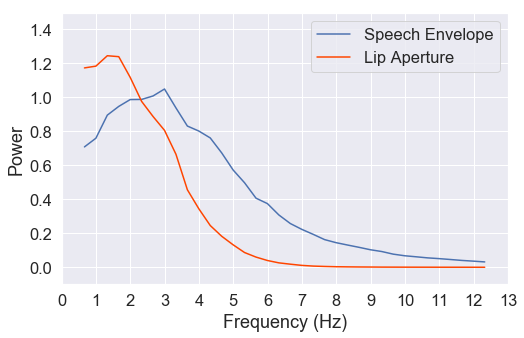

In [17]:
# the right psd calulation
normal = np.arange(0,100)
hyper = np.arange(100,150)
hypo = np.arange(150,200)
All = np.arange(0,200)
CC = [normal,hyper,hypo,All]
condition = ['normal','hyper','hypo','All']
condition = ['All']


frame =[]    

for con in range(0,len(condition)):
    R = CC[con]
    
    A = []
    for i in R:
        a = np.vstack((envelop[i][0],jawaopening[i][0].T,lipaparature[i][0].T,lipProtrusion[i][0].T,TTCD[i][0].T,
                       TMCD[i][0].T,TBCD[i][0].T))
        if(a.shape[1]>last_samp):
            A.append(a[:,first_samp:last_samp+1])
            
        #if(a.shape[1]<=4342):            
            #aa = np.pad(a, pad_width=((0, 0),(0, 4342-a.shape[1])), mode ='constant')
            #A.append(aa)    

    A = np.asarray(A)        
    epochs = mne.EpochsArray(A, info)
    #1.5hz
    psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0.5, fmax=40,bandwidth=2)
    # 2hz
    psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0.5, fmax=40)


    power = psds
    for f in range(0,len(extra_channels)):
        a = power[:,f,:]
        for fr in range(0,len(freqs)):
            b = a[:,fr]
            df = pd.DataFrame({'Data': [b],'Freq':freqs[fr],'Condition':condition[con],
                               'Features':extra_channels[f]})
            frame.append(df)
            
data=pd.concat((frame),axis=0)
data.set_index(['Features','Freq','Condition'], inplace=True)
data.sort_index(inplace=True)
data.head()  

# 
a  = data['Data'].apply(lambda x: np.mean(x))
data['mean_data'] = pd.Series(a, index=data.index)
a  = data['Data'].apply(lambda x: np.std(x))
data['std_data'] = pd.Series(a, index=data.index)


condition = ['All']
features = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']

features = ['envelop','lipaparature']
#condition = ['All','hyper','hypo','normal']

freqs = freqs[freqs<12.5]
FR = freqs

#FR
sns.set(style="white")
sns.set(font_scale=1.5)

f, ax = plt.subplots(figsize=(8,5))
color = ['b','orangered']
for ff in range(0,len(features)):
    a = data.loc[features[ff],freqs,condition]
    a = pd.DataFrame(a.reset_index())

    psds_mean = a['mean_data'][0:len(FR)]
    psds_std = a['std_data'][0:len(FR)]
    ax.plot(FR, psds_mean,color=color[ff])
    #ax.fill_between(FR, psds_mean - psds_std, psds_mean + psds_std,alpha=.5,color=color[ff])
    
ax.legend(features)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.set_title('')
ax.legend(['Speech Envelope','Lip Aperture'])
ax.set_xlim([0,13])
ax.set_ylim([-0.1,1.5])
plt.xticks(np.arange(0,14))  # Set locations and labels
plt.yticks(np.arange(0,1.6,0.2))  # Set locations and labels

plt.savefig('fig1b.eps', transparent=True, format='eps', dpi=300)



Text(0.5,1,'envelop')

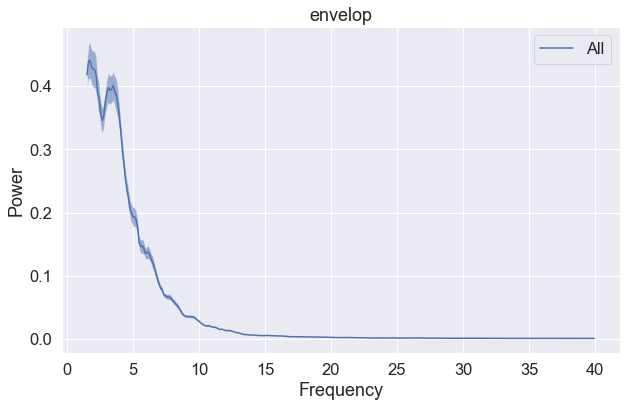

In [144]:
f, ax = plt.subplots(figsize=(10,6))

for con in condition:
    a = data.loc[features,freqs,con]
    a = pd.DataFrame(a.reset_index())

    psds_mean = a['mean_data'][0:len(FR)]
    psds_std = a['std_data'][0:len(FR)]
    ax.plot(FR, psds_mean)
    ax.fill_between(FR, psds_mean - psds_std, psds_mean + psds_std,alpha=.5)
    
ax.legend(condition)
ax.set_xlabel('Frequency')
ax.set_ylabel('Power')
ax.set_title(features[0])

In [10]:
# coherence between lip and envelop
def coherence_preprocess_delay(epochs,remove_first,d,trial_len,extra_channels,eeg_channles,condition):	

    
    E = epochs.copy()
        
    eeg = E.copy().pick_channels(eeg_channles)
    speech = E.copy().pick_channels(extra_channels)

    E = eeg.copy().crop(d+remove_first,d+remove_first+trial_len)
    S = speech.copy().crop(0.5+remove_first,0.5+remove_first+trial_len)
    
    #E = eeg.copy().crop(0.5+remove_first,0.5+remove_first+trial_len)
    #S = speech.copy().crop(d+remove_first,d+remove_first+trial_len)
    
    c = np.concatenate((E.get_data(),S.get_data()),axis=1)
    
    return c


def get_coherence(epochs,sfreq,fmin,fmax,indices,method,mode):
    con, freqs,_,_,_ = mne.connectivity.spectral_connectivity(epochs,method=method,mode=mode,sfreq=sfreq, 
                                                              fmin=fmin, fmax=fmax,indices=indices,
                                                        faverage=False, 
                                                        verbose='ERROR')

    return con,freqs

normal = np.arange(0,100)
hyper = np.arange(100,150)
hypo = np.arange(150,200)
All = np.arange(0,200)
con = ['normal','hyper','hypo','All']
con = ['All']
mode= 'multitaper'#fourier  multitaper
method = 'plv'#plv  coh

R = All
A = []
for i in R:
    a = np.vstack((envelop[i][0],jawaopening[i][0].T,lipaparature[i][0].T,lipProtrusion[i][0].T,TTCD[i][0].T,
                   TMCD[i][0].T,TBCD[i][0].T))
    if(a.shape[1]>last_samp):
        A.append(a[:,0:last_samp+1])

A = np.asarray(A)
epochs = mne.EpochsArray(A, info)
########################################coherence ema and envelop################à
remove_first = 0.5
features = ['jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
eeg_channles = ['envelop']
indices = (np.arange(1,7),np.tile(0,len(features)))
sfreq =400
fmin = 0.5
fmax = 40

delay = np.arange(-5,5.5,0.5) / 10

frame =[]    

for d in delay:
    c = coherence_preprocess_delay(epochs,remove_first,d+0.5,trial_len,features,eeg_channles,con)
    coh,freqs = get_coherence(c,sfreq,fmin,fmax,indices,method,mode)
    freqs = np.round(freqs,decimals=1)

    for fr in range(0,len(freqs)):
        a = freqs[fr]

        cc = np.split(coh[:,fr], len(features))
        for f in range(0,len(features)):
            feature = features[f]            
            df = pd.DataFrame({'Condition':con,'Freq':a,'Delay':d,'Feature':feature,'Subject':'aa',
                           'Data':cc[f].flatten(),'noTrials':epochs.get_data().shape[0],})
            frame.append(df) 

    print(str(d))
    
data=pd.concat((frame),axis=0)
save_path = data_path + '/python/data/coherence/Coh-removedFirst-'+str(remove_first)+'-'+str(trial_len)+ \
            '_envelop-EMA_trial_normalized_'+method+'-'+mode+'3cycle-1-40.5Hz-0.5step.pkl'
data.to_pickle(save_path)
clear_output()

In [8]:
trial_len

3

(1, 1952)

In [5]:
# coherence between lip and envelop
def coherence_preprocess_delay(epochs,remove_first,d,trial_len,extra_channels,eeg_channles,condition):	

    if condition != 'All':
        E = epochs[condition].copy()
    else:
        E = epochs.copy()
        
    eeg = E.copy().pick_channels(eeg_channles)
    speech = E.copy().pick_channels(extra_channels)

    E = eeg.copy().crop(d+remove_first,d+remove_first+trial_len)
    S = speech.copy().crop(0.5+remove_first,0.5+remove_first+trial_len)
    
    #E = eeg.copy().crop(0.5+remove_first,0.5+remove_first+trial_len)
    #S = speech.copy().crop(d+remove_first,d+remove_first+trial_len)
    
    c = np.concatenate((E.get_data(),S.get_data()),axis=1)
    
    return c


def get_coherence(epochs,sfreq,fmin,fmax,indices):
    con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(epochs, method='coh',mode='multitaper', 
                                                                                   sfreq=sfreq, 
                                                              fmin=fmin, fmax=fmax,indices=indices,faverage=False, 
                                                              tmin=0, mt_adaptive=True, block_size=1000,verbose='ERROR')

    return con,freqs

Tmin = 0
Tmax = 3.51
trial_len = 2

GA_epoches = []
save_path = data_path + '/python/data/coherence_epochs/Alice-coh-epo-'+str(Tmin)+'-' \
+str(Tmax)+'-trialLen-'+str(trial_len)+'_normalized.fif'
epochs = mne.read_epochs(save_path)
GA_epoches.append(epochs)

    
fmin = 1
fmax = 40.5
    
features = ['jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
eeg_channles = ['envelop']

sfreq = GA_epoches[0].info['sfreq']

condition = ['hyper','normal','hypo','All']
condition = ['All']

delay = np.arange(-5,6) / 10
delay = np.arange(-5,5.5,0.5) / 10


indices = (np.arange(1,7),np.tile(0,len(features)))
frames = []
s=0
for d in delay:        
    for con in condition:
        c = coherence_preprocess_delay(GA_epoches[s],remove_first,d+0.5,trial_len,features,eeg_channles,con)
        coh,freqs = get_coherence(c,sfreq,fmin,fmax,indices)

        freqs = np.round(freqs,decimals=1)

        for fr in range(0,len(freqs)):
            a = freqs[fr]

            cc = np.split(coh[:,fr], len(features))
            for f in range(0,len(features)):
                feature = features[f]

                if con != 'All':
                    df = pd.DataFrame({'Condition':con,'Freq':a,'Delay':d,'Subject':subject_name[s],'Feature':feature,
                                   'Data':cc[f].flatten(),'noTrials':GA_epoches[s][con].get_data().shape[0],})
                else:
                    df = pd.DataFrame({'Condition':con,'Freq':a,'Delay':d,'Subject':subject_name[s],'Feature':feature,
                                   'Data':cc[f].flatten(),'noTrials':GA_epoches[s].get_data().shape[0],})
                frames.append(df) 

    print(str(d)+'-'+subject_name[s])

data=pd.concat((frames),axis=0)
save_path = data_path + '/python/data/coherence/Coh-removedFirst-'+str(remove_first)+'-'+str(trial_len)+ \
            '_envelop-EMA_trial_normalized_freq.pkl'
data.to_pickle(save_path)

This filename (D:\projects\current\listen_italian_motor_entrainment\analysis/python/data/coherence_epochs/Alice-coh-epo-0-3.51-trialLen-2_normalized.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
Reading D:\projects\current\listen_italian_motor_entrainment\analysis/python/data/coherence_epochs/Alice-coh-epo-0-3.51-trialLen-2_normalized.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3507.50 ms
        0 CTF compensation matrices available
124 matching events found
No baseline correction applied
124 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
-0.5-Alice
-0.45-Alice
-0.4-Alice
-0.35-Alice
-0.3-Alice
-0.25-Alice
-0.2-Alice
-0.15-Alice
-0.1-Alice
-0.05-Alice
0.0-Alice
0.05-Alice
0.1-Alice
0.15-Alice
0.2-Alice
0.25-Alice
0.3-Alice
0.35-Alice
0.4-Alice
0.45-Alice
0.5-Alice


In [111]:
features = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
condition = ['hyper','normal','hypo','All']

# define frequencies of interest (log-spaced)
freqs = np.logspace(*np.log10([1, 40]), num=40)
n_cycles = freqs / 3.  # different number of cycle per frequency
     
frame =[]    
for con in condition:
    if con != 'All':
        E = GA_epoches[0][con].copy()
    else:
        E = GA_epoches[0].copy()

    speech = E.pick_channels(features)    
    power = mne.time_frequency.tfr_morlet(speech, freqs=freqs, n_cycles=n_cycles,average=False,return_itc=False)
    
    power = np.mean(power.data,axis=3)
    for f in range(0,len(features)):
        a = power[:,f,:]
        for fr in range(0,len(freqs)):
            b = a[:,fr]
            df = pd.DataFrame({'Data': [np.mean(b)],'Freq':freqs[fr],'Condition':con,'Feaures':features[f]})
            frame.append(df)
        
data=pd.concat((frame),axis=0)
data.head()        

,Condition,Data,Feaures,Freq
0,hyper,0.097801,envelop,1.000000
0,hyper,0.097382,envelop,1.099204
0,hyper,0.096881,envelop,1.208250
0,hyper,0.096284,envelop,1.328114
0,hyper,0.095573,envelop,1.459869


(28,)


ValueError: arrays must all be same length

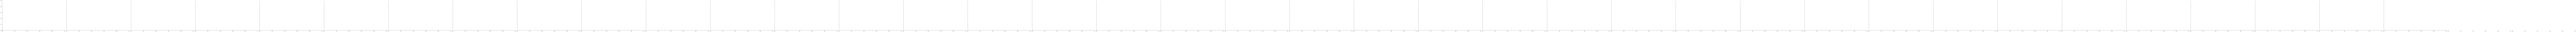

In [109]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    x = data['Data']
    sns.tsplot(x, time="Freq", condition="Feaures", value="Data",
                    color="deep", err_style="ci_bars")
    
g = sns.FacetGrid(data,  col='Freq',margin_titles=True,size=6,aspect=2)
b = g.map_dataframe(draw_heatmap, 'Data')



In [ ]:
b = g.map_dataframe(sns.tsplot, time="Freq", condition="Feaures", value="Data",
                    color="deep", err_style="ci_bars").add_legend()

In [ ]:

b = b.set_xlabels('Frequency')
b = b.set_ylabels('Coherence')
#b.ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#b.ax.grid(b=True, which='minor', color='w', linewidth=0.5)
b.fig.subplots_adjust(top=0.9)
b.fig.suptitle('EEG Delayed by 200 ms')
b.set(xticks=fi,xlim=(2, 41))
b.set_xticklabels(freq,rotation=0)

    using multitaper spectrum estimation with 7 DPSS windows


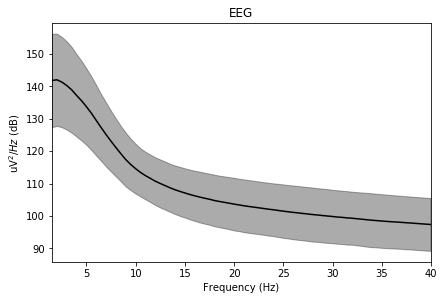

In [87]:
features = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
condition = ['hyper','normal','hypo','All']

speech = GA_epoches[0][condition].copy().pick_channels(features)
#S = speech.copy().crop(0.5+remove_first,0.5+remove_first+trial_len)
fmin, fmax = 1, 40  # look at frequencies between 2 and 300Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2
tmin, tmax = 0, 2  # use the first 60s of data

a=speech.plot_psd(tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax)

In [93]:
power = mne.time_frequency.tfr_morlet(speech, freqs=freqs, n_cycles=n_cycles,average=False,return_itc=False)

power.data.shape

(124, 7, 40, 1404)

In [94]:
power = np.mean(power.data,axis=3)
power.data.shape

(124, 7, 40)

In [96]:
a = power[:,0,:]
a.shape

(124, 40)

    using multitaper spectrum estimation with 7 DPSS windows


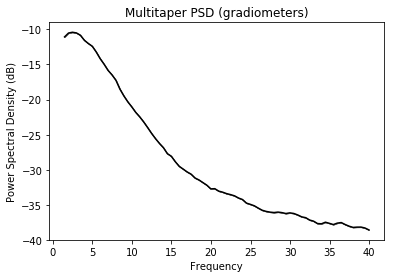

In [79]:
f, ax = plt.subplots()
psds, freqs = mne.time_frequency.psd_multitaper(speech,tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax)
psds = 10. * np.log10(psds)
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [80]:
psds_std.shape

(78,)

    using multitaper spectrum estimation with 7 DPSS windows


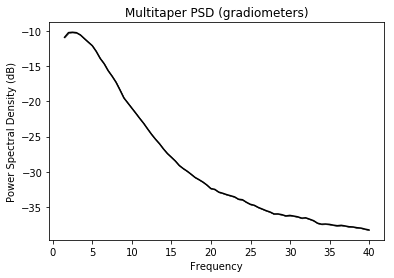

In [25]:
f, ax = plt.subplots()
psds, freqs = mne.time_frequency.psd_multitaper(speech,tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax)
psds = 10. * np.log10(psds)
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()